In [34]:
import random
import numpy as np
# import tensorflow
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
class Student:
    def __init__(self, choice):
        self.choice = choice
        self.policy_class = 0


class PolicyClassroom:
    def __init__(self, class_num):
        self.student = np.zeros(20)
        self.class_num = class_num
        self.diversity_list = []
        
        
    def add_student(self, choice):
        self.student[choice] += 1
    
    def diversity(self):
        sum = 0.0
        for choice in self.student:
            sum += choice
        diversity = 0.0
        for choice in self.student:
            diversity += choice ** 2 / sum ** 2
        self.diversity_list.append(diversity)
        return diversity
        

class LearningClassroom:
    def __init__(self):
        pass

1.0
0.5
0.5555555555555556
0.375
0.28
0.2222222222222222
0.18367346938775508
0.1875
0.18518518518518517
0.16
0.17355371900826447
0.18055555555555558
0.15976331360946747
0.17346938775510204
0.15555555555555556
0.1484375
0.13494809688581313
0.12345679012345678
0.11911357340720222
0.11000000000000001
0.10204081632653059
0.09917355371900827
0.09262759924385633
0.08680555555555555
0.0848
0.07988165680473373
0.07544581618655691
0.07142857142857144
0.07015457788347204
0.06666666666666667
0.06555671175858481
0.06640625
0.06519742883379247
0.0657439446366782
0.06448979591836734
0.06327160493827161
0.0635500365230095
0.06371191135734072
0.06508875739644972


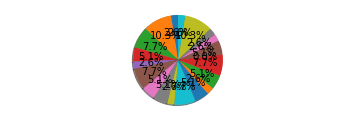

      0
0   1.0
1   4.0
2   3.0
3   2.0
4   1.0
5   3.0
6   2.0
7   2.0
8   1.0
9   3.0
10  2.0
11  1.0
12  2.0
13  3.0
14  0.0
15  2.0
16  1.0
17  1.0
18  4.0
19  1.0


In [36]:
class1 = PolicyClassroom(1)
diversity_list = []
choice_list = np.zeros(20)
for i in range(1, 40):
    # choice = random.randint(1, 20) - 1
    choice = random.randint(0, 19)
    choice_list[choice] += 1
    class1.add_student(choice)
    diversity_list.append(class1.diversity())
    print(class1.diversity())

# add a plt for choice diversity
plt.plot(np.linspace(0, 39, 39), diversity_list)
plt.title('Diversity')

# labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'

plt.subplot(2,1,2)
plt.pie(choice_list, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')

plt.show()

df = pd.DataFrame(choice_list)
print(df)

In [37]:
class QLearning:

    def __init__(self):
        pass


In [38]:
from itertools import combinations

combins = [c for c in combinations(range(1, 7), 3)]
print("所有排列:")
print(combins)


def transform(student):
    return combins.index(student.choice) + 1

# s1 = Student(choice=(1,2,3))
# transform(s1)

所有排列:
[(1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 2, 6), (1, 3, 4), (1, 3, 5), (1, 3, 6), (1, 4, 5), (1, 4, 6), (1, 5, 6), (2, 3, 4), (2, 3, 5), (2, 3, 6), (2, 4, 5), (2, 4, 6), (2, 5, 6), (3, 4, 5), (3, 4, 6), (3, 5, 6), (4, 5, 6)]


In [39]:
def newPolicyClassroom(classNum):
    return PolicyClassroom(classNum)

def newPolicyClassrooms(totalNum):
    list = []
    for i in range(1,totalNum+1):
        list.append(newPolicyClassroom(i))
    return list
        
classroom_list = [classroom for classroom in newPolicyClassrooms(13)]
classroom_list

In [40]:
def generateRandomStudent():
    choice = random.randint(1,21)
    # 1 <= choice <= 20
    return choice

In [41]:
def generateRandomStudents(totalNum):
    list = []
    for num in range(1,totalNum+1):
        list.append(generateRandomStudent())
    return list

In [42]:
def addStudentToPolicyClassroom(student_list):
    for student in student_list:
        gotoClassroomNum = random.randint(1,13)
        print(gotoClassroomNum)
        # 1 <= gotoClassroomNum <= 13
        classroom_list[gotoClassroomNum-1].add_student(student-1)
        classroom_list[gotoClassroomNum-1].diversity()

In [43]:
students = generateRandomStudents(500)
addStudentToPolicyClassroom(students)

11
12
7
7
8
7
9
13
1
5
7
8
9
10
13
1
13
5
2
6
8
7
9
4
2
11
5
1
2
12
2
4
2
3
8
11
11
7
3
12


IndexError: index 20 is out of bounds for axis 0 with size 20

In [ ]:
for c in classroom_list:
    print(c.diversity())